# **Лабораторная работа №2**
**Чаплин Виталий (гр.5130901/10202)**

# Упражнение 2.2

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Создадим пилообразный сигнал, используя класс SawtoothSignal.

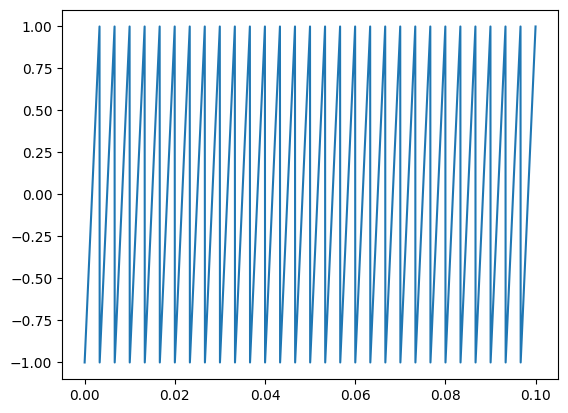

In [ ]:
from thinkdsp import SawtoothSignal, SquareSignal, TriangleSignal, decorate
sawtooth = SawtoothSignal(300)
segment = sawtooth.make_wave(duration = 0.1, framerate = 30000)
segment.plot()

Определим звучание данного сигнала.

In [ ]:
sawtooth = SawtoothSignal().make_wave(duration=3, framerate=40000)
sawtooth.make_audio()

Вычислим спектр данного сигнала.

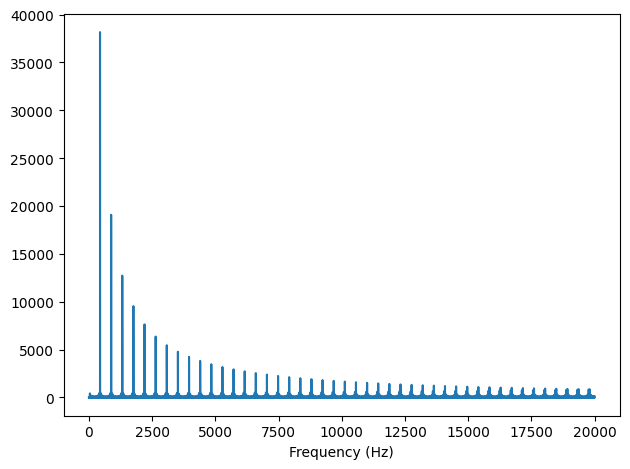

In [ ]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Выполним сравнение спектров различного вида сигналов.

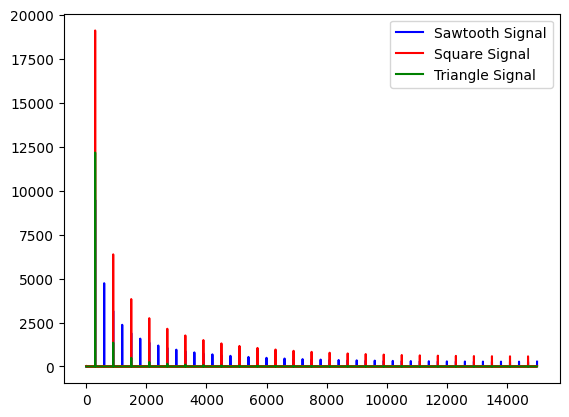

In [ ]:
import matplotlib.pyplot as plt
sawtooth = SawtoothSignal(300).make_wave(duration=1, framerate=30000)
sawtooth_spectrum = sawtooth.make_spectrum()
sawtooth_spectrum.plot(color="blue", label="Sawtooth Signal")
square = SquareSignal(300).make_wave(duration=1, framerate=30000)
square_spectrum = square.make_spectrum()
square_spectrum.plot(color="red", label="Square Signal")
triangle = TriangleSignal(300).make_wave(duration=1, framerate=30000)
triangle_spectrum = triangle.make_spectrum()
triangle_spectrum.plot(color="green", label="Triangle Signal")
plt.legend()
plt.show()

По графику видно, что пилообразный сигнал, в отличие от других, содержит и четные, и нечетные гармоники. По сравнению с треугольным сигналом, пилообразный спадает не так быстро, но медленнее, чем квадратный.

# Упражнение 2.3

Создадим прямоугольный сигнал 1100 Гц.

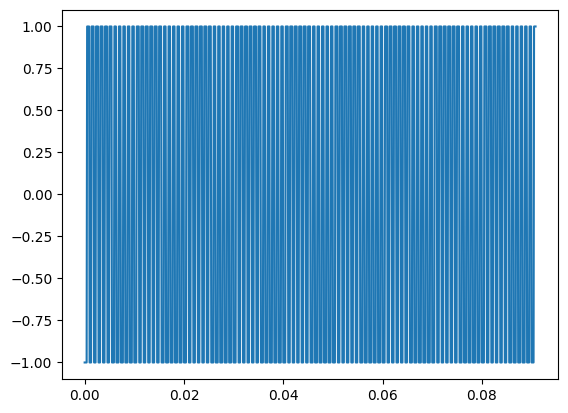

In [ ]:
from thinkdsp import SquareSignal
signal = SquareSignal(1100)
duration = signal.period * 100
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

In [ ]:
wave = signal.make_wave(duration = 3, framerate = 10000)
wave.make_audio()

Построим спектр

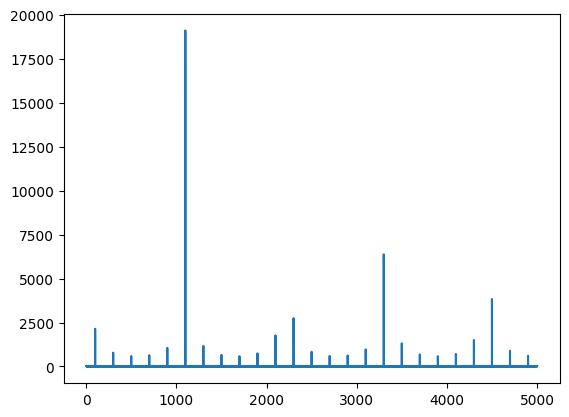

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()

При прослушивании аудио сигнала завернутые гармоники обычно проявляются как дополнительные звуки или шумы, которые могут привести к искажению звука. Эти звуки могут быть слышны как треск, свист, гудение или другие аномалии в звучании. В данном фрагменте чувсвтуется биение.

# Упражнение 2.4

Создадим треугольный сигнал с частотой 440 Гц длительностью 0.01 с

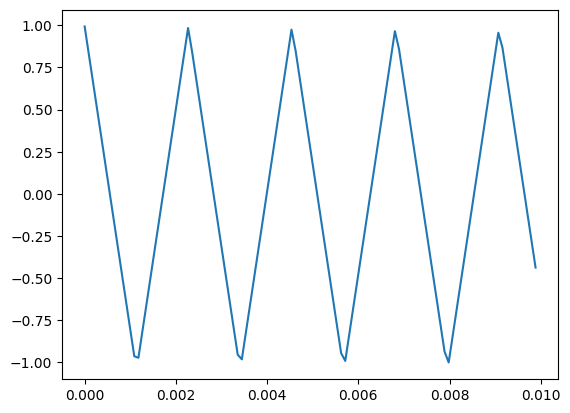

In [ ]:
from thinkdsp import TriangleSignal
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()

Первый элемент спектра - это комплексное число, близкое к нулю.

In [ ]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Установим hs[0] = 100

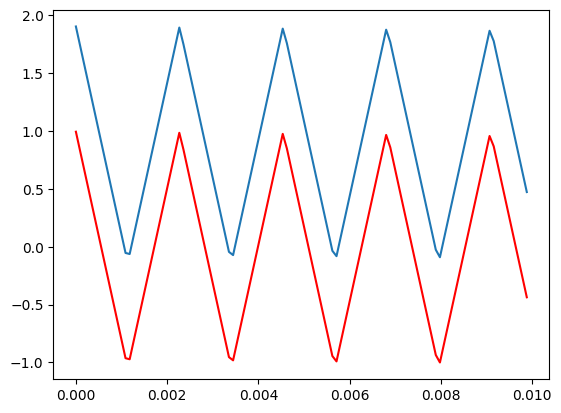

In [ ]:
spectrum.hs[0] = 100
triangle.plot(color='red')
spectrum.make_wave().plot()

 Произошло смещение графика по вертикали.

# Упражнение 2.5

Напишем функцию в соответствии с заданием:

In [ ]:
def filter_spectrum(spectrum):
  spectrum.hs[1:] /= spectrum.fs[1:]
  spectrum.hs[0] = 0

Послушаем прямоугольный сигнал и пстроим спектр без применения функции

In [ ]:
wave = SquareSignal(440).make_wave(duration = 1)
wave.make_audio()

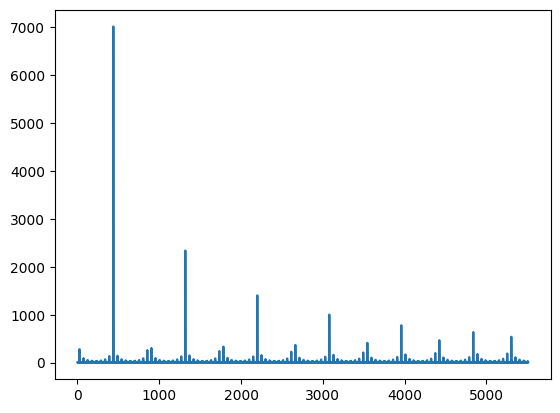

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()

Теперь применим созданную функцию

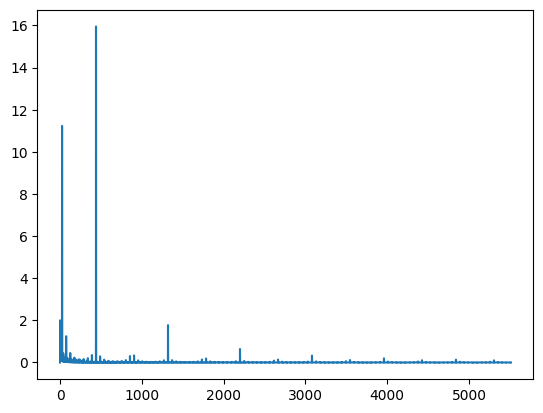

In [ ]:
filter_spectrum(spectrum)
spectrum.plot()

In [ ]:
new_wave = spectrum.make_wave()
new_wave.make_audio()

Звук стал будто более тихим, приглушенным

# Упражнение 2.6

Возьмем пилообразный сигнал, который содержит все необходимые гармоники

In [ ]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

Рассмотрим спектр.

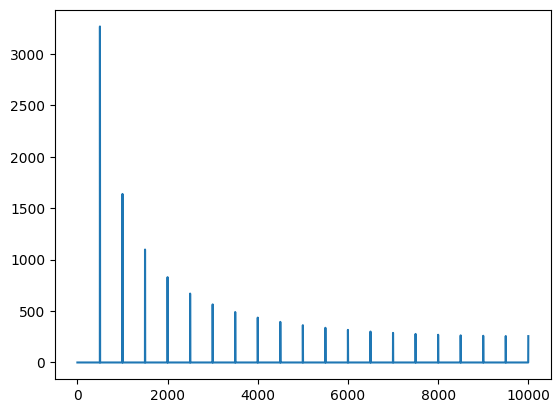

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()

Гармоники уменьшаются пропорционально *1/f*

Однако если мы воспользуемся функцией, которую написали в предыдущем упражнении, то сможем изменить тенденцию уменьшения гармоник.

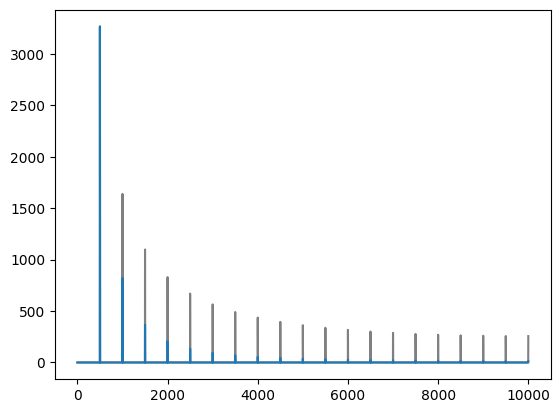

In [ ]:
spectrum.plot(color='grey')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

Послушаем сигнал после изменений

In [ ]:
wave = spectrum.make_wave()
wave.make_audio()

Теперь гармоники уменьшаются пропорционально *1/f^2*